In [2]:
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## 데이터 불러온 후 학습

##### 모델링을 먼저 해야 뒤에 feature importance를 볼 수 있음

In [27]:
# Iris 데이터 불러오기
iris = load_iris()

# DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156, max_depth = 5, min_samples_split = 3, min_samples_leaf = 3)

# 데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)

# 모델 훈련
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3,
                       random_state=156)

## 시각화 하기

In [28]:
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris.target_names,
               feature_names = iris.feature_names, impurity=True, filled=True)

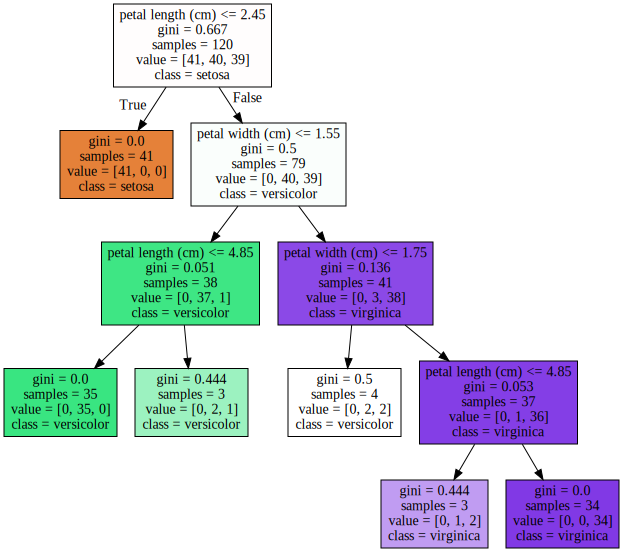

In [29]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook 상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Feature importance 추출

Feature importances:
[0.    0.    0.554 0.446]
sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.554
petal width (cm) : 0.446


<AxesSubplot:>

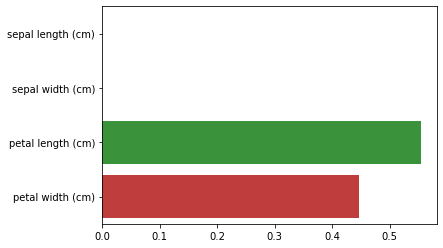

In [32]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance extraction
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print("{0} : {1:.3f}".format(name, value))
    
# feature importance를 column별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

## 결정 트리 x, y 생성

In [77]:
from sklearn.datasets import make_classification

# 2차원 시각화를 위해서 feature 2개, class는 3가지 유형의 classification 샘플 데이터 생성
x_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

## 시각화를 통한 과적합 여부 확인

In [83]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf()를 이용하여 class boundary visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

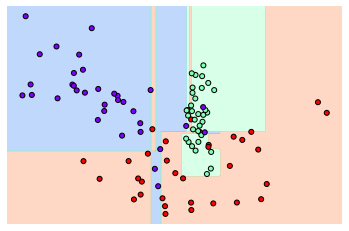

In [79]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier().fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)

##### - 곳곳에 outlier들이 있음. 과적합된 것

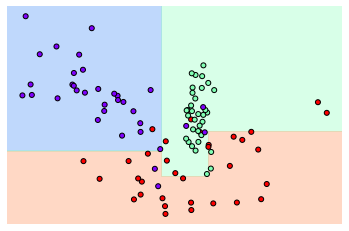

In [82]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)

##### - 하이퍼 파라미터 조정!